In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
link = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Loan%20Application%20Status/loan_prediction.csv'
df = pd.read_csv(link, header=None)
column_names = ['Loan_ID', 'Gender', 'Married','Dependents', 'Education', 'Self_Employed', 'Applicant_Income', 
                'Coapplicant_Income', 'Loan_Amount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']  

# Assign the column names to the DataFrame
df.columns = column_names

In [3]:
df.shape

(614, 13)

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    object 
 1   Gender              601 non-null    object 
 2   Married             611 non-null    object 
 3   Dependents          599 non-null    object 
 4   Education           614 non-null    object 
 5   Self_Employed       582 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         592 non-null    float64
 9   Loan_Amount_Term    600 non-null    float64
 10  Credit_History      564 non-null    float64
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount           22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
dtype: int64

In [7]:
for column in df.select_dtypes(include=['object']).columns:
    print(df[column].value_counts())

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64
Gender
Male      489
Female    112
Name: count, dtype: int64
Married
Yes    398
No     213
Name: count, dtype: int64
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64
Self_Employed
No     500
Yes     82
Name: count, dtype: int64
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64
Loan_Status
Y    422
N    192
Name: count, dtype: int64


In [8]:
{column: list(df[column].unique()) for column in df.select_dtypes('object').columns}

{'Loan_ID': ['LP001002',
  'LP001003',
  'LP001005',
  'LP001006',
  'LP001008',
  'LP001011',
  'LP001013',
  'LP001014',
  'LP001018',
  'LP001020',
  'LP001024',
  'LP001027',
  'LP001028',
  'LP001029',
  'LP001030',
  'LP001032',
  'LP001034',
  'LP001036',
  'LP001038',
  'LP001041',
  'LP001043',
  'LP001046',
  'LP001047',
  'LP001050',
  'LP001052',
  'LP001066',
  'LP001068',
  'LP001073',
  'LP001086',
  'LP001087',
  'LP001091',
  'LP001095',
  'LP001097',
  'LP001098',
  'LP001100',
  'LP001106',
  'LP001109',
  'LP001112',
  'LP001114',
  'LP001116',
  'LP001119',
  'LP001120',
  'LP001123',
  'LP001131',
  'LP001136',
  'LP001137',
  'LP001138',
  'LP001144',
  'LP001146',
  'LP001151',
  'LP001155',
  'LP001157',
  'LP001164',
  'LP001179',
  'LP001186',
  'LP001194',
  'LP001195',
  'LP001197',
  'LP001198',
  'LP001199',
  'LP001205',
  'LP001206',
  'LP001207',
  'LP001213',
  'LP001222',
  'LP001225',
  'LP001228',
  'LP001233',
  'LP001238',
  'LP001241',
  'LP0012

In [10]:
#removing Loan_ID column 
df.drop(['Loan_ID'], axis=1, inplace=True)

In [12]:
cate_vars = df.select_dtypes('object').columns
cate_vars

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

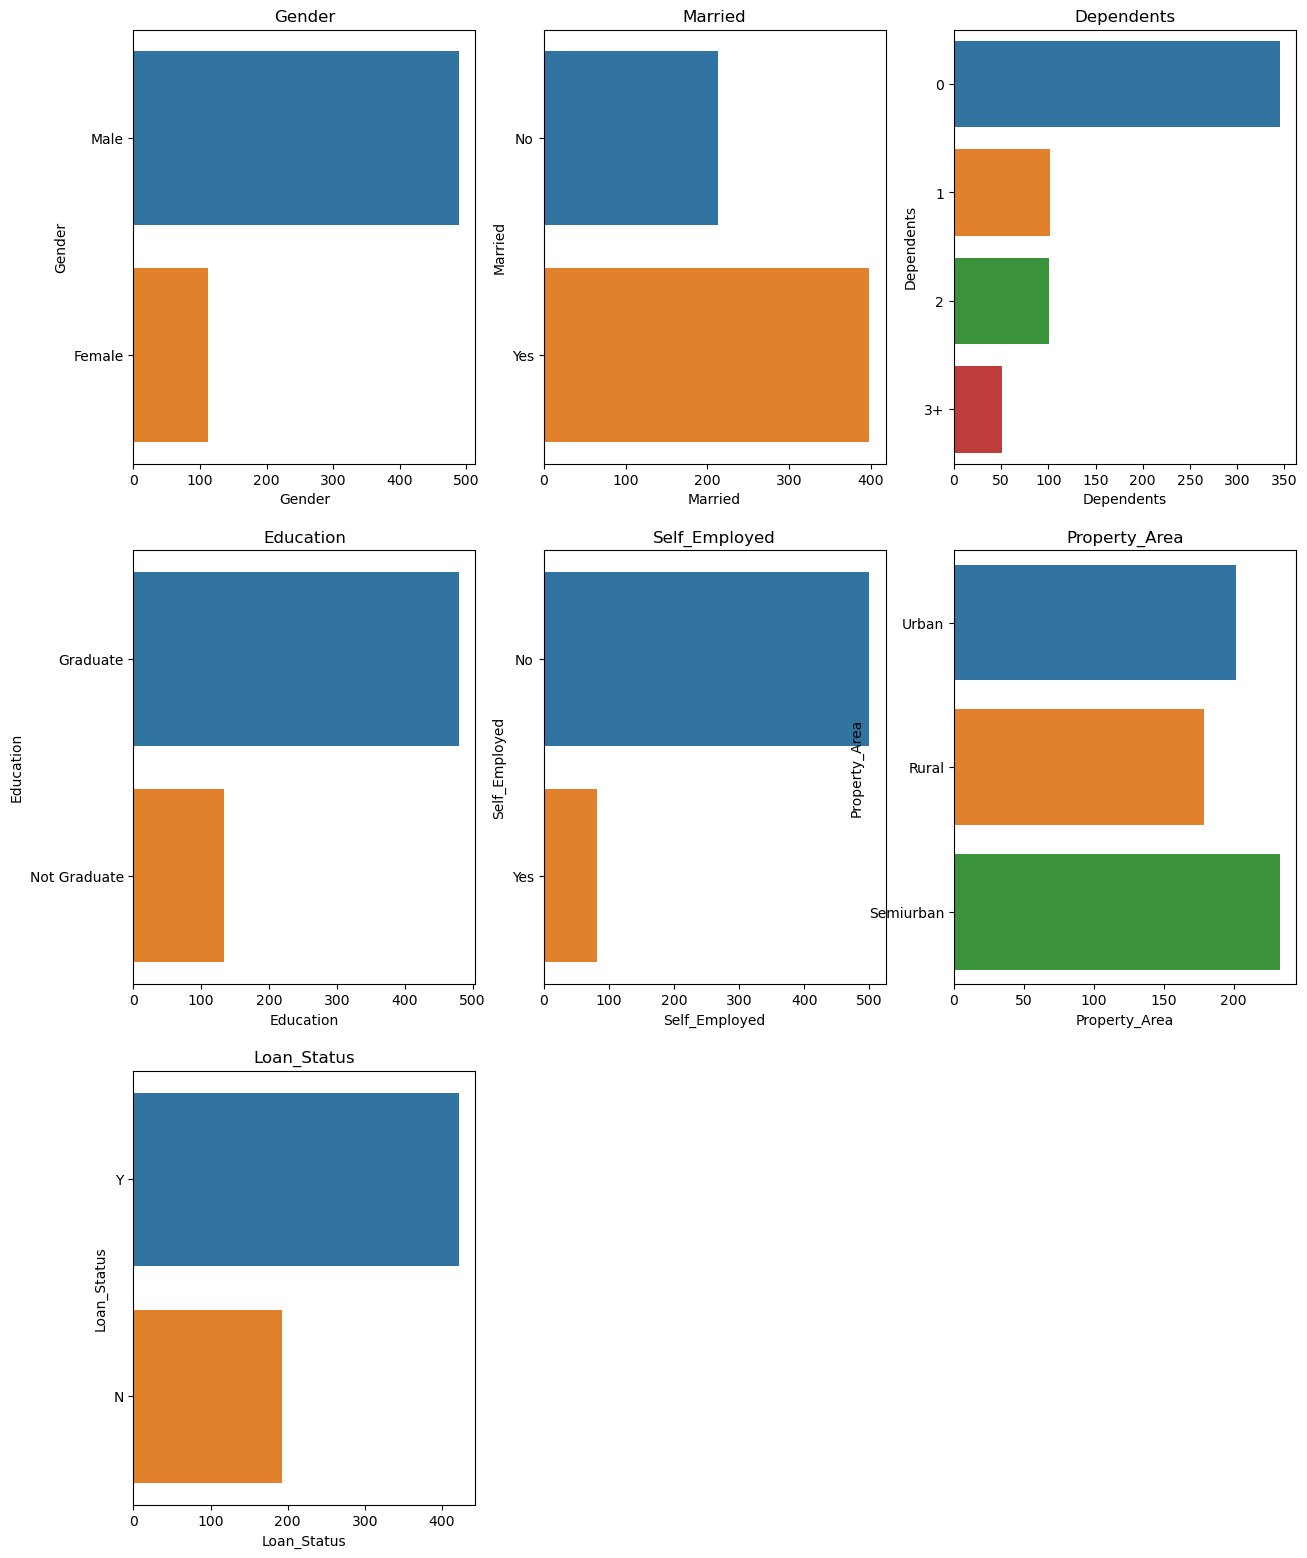

In [13]:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for cate_var in cate_vars:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=cate_var,data=df)
    plt.xlabel(cate_var)
    plt.title(cate_var)
    plotnumber+=1
plt.show()

In [14]:
#we can fill the NaN values for the categorical columns with the column mode
for column in ['Gender', 'Married', 'Dependents', 'Self_Employed']:
    df[column].fillna(df[column].mode(), inplace=True)

In [15]:
#we can fill the NaN values for other columns with the column mean
for column in ['Loan_Amount', 'Loan_Amount_Term', 'Credit_History']:
    df[column].fillna(df[column].mean(), inplace=True)

In [16]:
#encoding the categorical values
#binary encoding for Gender, married, education, self-employed and Loan Status
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#X['Gender'] = X['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [17]:
df

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [ ]:
# scale the data before training the model
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x = StandardScaler()
df = scaler_x.fit_transform(df)

In [19]:
#we need to perdict the Loan Status, hence separating them
y = df['Loan_Status'].copy()
X = df.drop(['Loan_Status'], axis = 1).copy()

In [20]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [21]:
X

,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2


Training

In [22]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

In [23]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier()
]

for model in models:
    model.fit(X_train, y_train)

In [24]:
model_names = [
    "   Logistic Regression",
    "         Decision Tree",
    "         Random Forest",
    "               XGBoost"
]

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(name)
    print("Accuracy: {:.4f}%".format(accuracy * 100))
    print("Precision: {:.4f}".format(precision))
    print("Recall: {:.4f}".format(recall))
    print("F1-score: {:.4f}".format(f1))
    print("Confusion Matrix:\n", cm)
    print("-" * 50)

   Logistic Regression
Accuracy: 77.8378%
Precision: 0.7564
Recall: 0.9752
F1-score: 0.8520
Confusion Matrix:
 [[ 26  38]
 [  3 118]]
--------------------------------------------------
         Decision Tree
Accuracy: 66.4865%
Precision: 0.7479
Recall: 0.7355
F1-score: 0.7417
Confusion Matrix:
 [[34 30]
 [32 89]]
--------------------------------------------------
         Random Forest
Accuracy: 76.7568%
Precision: 0.7532
Recall: 0.9587
F1-score: 0.8436
Confusion Matrix:
 [[ 26  38]
 [  5 116]]
--------------------------------------------------
               XGBoost
Accuracy: 74.0541%
Precision: 0.7589
Recall: 0.8843
F1-score: 0.8168
Confusion Matrix:
 [[ 30  34]
 [ 14 107]]
--------------------------------------------------
